# LIA benchmark analysis
Pandas cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.core.display import display, HTML

    #Uses commit 4d56be1d5 bug fix: handle equalities
    The base solver was run with the previous commit. The changes will not affect the base solver in any way

In [6]:
fname='gspc-fw.csv'
csm = pd.read_csv(fname)
# move timeout and unknown to maximal time
csm['time'].fillna(value=900, inplace=True)
csm['result'].fillna(value="timeout", inplace=True)
# show a snapshot of data for visual validation
csm.head()

,index,SPACER_cluster_out_of_gas,SPACER_expand_pob_undef,SPACER_inductive_level,SPACER_max_cluster_size,SPACER_max_cvx_reduced_dim,depth,SPACER_max_query_lvl,SPACER_need_sage,SPACER_num_abstractions,...,time_spacer_solve_propagate,time_spacer_solve_pt_must_reachable,time_spacer_solve_reach,time_spacer_solve_reach_children,time_spacer_solve_reach_cluster,time_spacer_solve_reach_gen_bool_ind,time_spacer_solve_reach_gen_merge,time_spacer_solve_reach_gen_merge_cvx_cls,time_spacer_solve_reach_gen_wide,time_spacer_solve_reach_is_reach
0,chc-lia-0000.smt2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.00,NaN,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00
1,chc-lia-0001.smt2,NaN,NaN,12.0,6.0,1.0,12.0,12.0,NaN,38.0,...,0.03,NaN,0.24,0.02,0.04,0.00,0.06,0.0,0.06,0.01
2,chc-lia-0002.smt2,NaN,NaN,100.0,50.0,1.0,102.0,102.0,NaN,20.0,...,4.81,NaN,118.06,2.55,3.88,34.70,7.89,0.0,7.89,0.20
3,chc-lia-0003.smt2,NaN,NaN,NaN,7.0,1.0,8.0,8.0,NaN,1.0,...,0.01,NaN,0.16,0.01,0.02,0.02,0.02,0.0,0.02,0.00
4,chc-lia-0004.smt2,NaN,10.0,8.0,4.0,1.0,8.0,8.0,NaN,19.0,...,0.02,NaN,0.13,0.01,0.02,0.00,0.02,0.0,0.02,0.01


In [7]:
# quick overview of solved/unsolved instances
csm[['result','index']].groupby(['result']).count()

,index
result,
sat,416
timeout,98
unsat,151


# Comparison with base solver

In [16]:
fname = "spc-bw.csv"
base = pd.read_csv(fname)
base['time'].fillna(value=900, inplace=True)
base['result'].fillna(value="timeout", inplace=True)
base[['result','index']].groupby(['result']).count()

,index
result,
sat,349
timeout,162
unknown,1
unsat,153


In [17]:
base.query('result == "unknown"')[["index"]]

,index
355,chc-lia-lin-0015.smt2


In [20]:
chc_comb = pd.merge(csm, base, on = "index", how = "inner")
#sanity check. Make sure they don't disagree
chc_comb.query('(result_x == "sat" & result_y == "unsat") | (result_y == "sat" & result_x == "unsat")')

,index,SPACER_cluster_out_of_gas,SPACER_expand_pob_undef_x,SPACER_inductive_level_x,SPACER_max_cluster_size,SPACER_max_cvx_reduced_dim,depth_x,SPACER_max_query_lvl_x,SPACER_need_sage,SPACER_num_abstractions,...,time_spacer_init_rules_y,time_spacer_init_rules_pt_init_y,time_spacer_mbp_y,time_spacer_solve_y,time_spacer_solve_propagate_y,time_spacer_solve_pt_must_reachable_y,time_spacer_solve_reach_y,time_spacer_solve_reach_children_y,time_spacer_solve_reach_gen_bool_ind_y,time_spacer_solve_reach_is_reach_y


In [21]:
chc_comb.query('(result_x != "sat" & result_y == "sat") & (depth_y < depth_x)')

,index,SPACER_cluster_out_of_gas,SPACER_expand_pob_undef_x,SPACER_inductive_level_x,SPACER_max_cluster_size,SPACER_max_cvx_reduced_dim,depth_x,SPACER_max_query_lvl_x,SPACER_need_sage,SPACER_num_abstractions,...,time_spacer_init_rules_y,time_spacer_init_rules_pt_init_y,time_spacer_mbp_y,time_spacer_solve_y,time_spacer_solve_propagate_y,time_spacer_solve_pt_must_reachable_y,time_spacer_solve_reach_y,time_spacer_solve_reach_children_y,time_spacer_solve_reach_gen_bool_ind_y,time_spacer_solve_reach_is_reach_y
637,chc-lia-lin-0298.smt2,NaN,369.0,NaN,157.0,3.0,64.0,63.0,5.0,117.0,...,0.06,0.02,0.86,90.87,15.55,NaN,75.16,3.0,37.28,NaN


In [25]:
#the new solver had to search deeper to find the inductive invariant
chc_comb[((chc_comb["result_x"] == "sat") & (chc_comb["result_y"] == "sat") & (chc_comb["depth_x"] > chc_comb["depth_y"] + 10))][["index", "depth_x", "depth_y"]]

,index,depth_x,depth_y
36,chc-lia-0046.smt2,37.0,25.0
72,chc-lia-0112.smt2,46.0,35.0
115,chc-lia-0158.smt2,29.0,18.0
437,chc-lia-lin-0098.smt2,44.0,18.0
592,chc-lia-lin-0253.smt2,105.0,73.0
635,chc-lia-lin-0296.smt2,61.0,41.0
655,chc-lia-lin-0316.smt2,123.0,66.0


In [26]:
chc_comb[((chc_comb["result_x"] == "sat") & (chc_comb["result_y"] == "sat") & (chc_comb["depth_x"] == chc_comb["depth_y"]))][["index", "depth_x", "depth_y"]]

,index,depth_x,depth_y
0,chc-lia-0000.smt2,1.0,1.0
2,chc-lia-0002.smt2,102.0,102.0
18,chc-lia-0019.smt2,7.0,7.0
45,chc-lia-0058.smt2,4.0,4.0
46,chc-lia-0059.smt2,4.0,4.0
...,...,...,...
613,chc-lia-lin-0274.smt2,99.0,99.0
614,chc-lia-lin-0275.smt2,108.0,108.0
615,chc-lia-lin-0276.smt2,95.0,95.0
616,chc-lia-lin-0277.smt2,105.0,105.0


len(A): 416 	len(B): 349
No. values 340
Min val, A: 1.0 	B: 1.0
Max val, A: 143.0 	B: 202.0
Avg val, A: 18.31 	B: 20.84


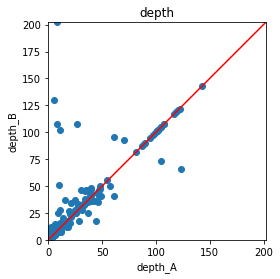

In [27]:
def preprocess(df, sat):  
    if sat == True:
        return df.query('result == "sat"')
    else:
        return df.query('result == "unsat"')
        
def compare_values(columns, df_A, df_B):
    vals_A = df_A[['index'] + list(columns)]
    vals_B = df_B[['index'] + list(columns)]
    merged = vals_A.merge(vals_B, how='inner', left_index=True, on='index')
    return merged

def scatter_values(column, df_A, df_B):
    vals = compare_values((column, ), df_A, df_B)
    xlabel = column + '_x'
    ylabel = column + '_y'
    
    xs = vals[xlabel]
    ys = vals[ylabel]
    
    print('len(A):', len(df_A), '\tlen(B):', len(df_B))
    print('No. values', len(xs))
    print('Min val, A:', min(xs), '\tB:', min(ys))
    print('Max val, A:', max(xs), '\tB:', max(ys))
    print('Avg val, A:', "{:0.2f}".format(np.mean(xs)), '\tB:', "{:0.2f}".format(np.mean(ys)))
    
    min_val = min(0, min(xs), min(ys))
    max_val = max(max(xs), max(ys))
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    
    plt.scatter(xs, ys)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel(column + '_A')
    plt.ylabel(column + '_B')
    
    mid_x = np.linspace(min_val, max_val, 2)
    mid_y = mid_x
    plt.plot(mid_x, mid_y, 'r-')
    plt.title(column)
    
    plt.rcParams['figure.dpi'] = 160
    plt.draw()
    

chc_csm = preprocess(flt_index(csm, 'chc-lia'), True)
chc_base = preprocess(flt_index(base, 'chc-lia'), True)

scatter_values('depth', chc_csm, chc_base)

len(A): 416 	len(B): 349
No. values 340
Min val, A: 0.0 	B: 0.0
Max val, A: 533.98 	B: 591.19
Avg val, A: 44.66 	B: 48.91


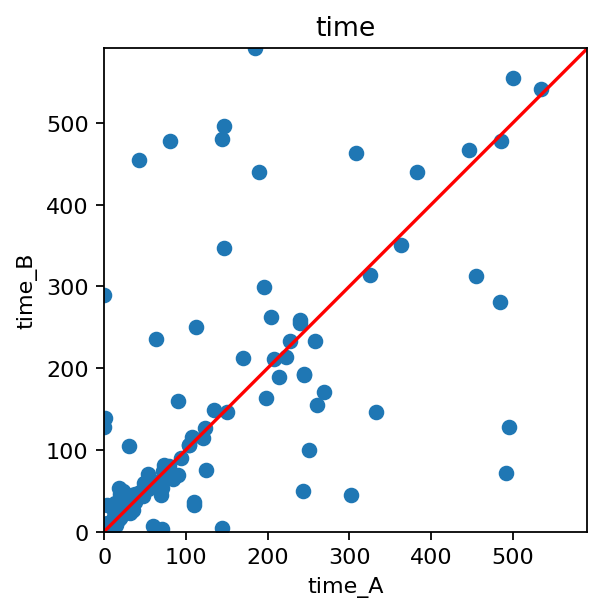

In [28]:
scatter_values('time', chc_csm, chc_base)

# Comparing csm_iuc with csm_fw

In [32]:
fname='gspc-fw.csv'
csm_fw = pd.read_csv(fname)
# move timeout and unknown to maximal time
csm_fw['time'].fillna(value=900, inplace=True)
csm_fw['result'].fillna(value="timeout", inplace=True)


fname='gspc-sc.csv'
csm_sc = pd.read_csv(fname)
# move timeout and unknown to maximal time
csm_sc['time'].fillna(value=900, inplace=True)
csm_sc['result'].fillna(value="timeout", inplace=True)


comb = pd.merge(csm_sc, csm_fw, on = "index", how = "inner")
#filter out instances in which iuc solver converged sooner even though it explored deeper
itp_delay = comb.query('(result_x == "sat" & result_y == "sat") & (time_x < time_y - 100) & (depth_x >= depth_y)')
display(itp_delay[["index", "time_x", "time_y", "depth_x", "depth_y", "time_iuc_solver_get_iuc", "time_spacer_solve_reach_gen_bool_ind_x", "time_spacer_solve_reach_gen_bool_ind_y"]])

,index,time_x,time_y,depth_x,depth_y,time_iuc_solver_get_iuc,time_spacer_solve_reach_gen_bool_ind_x,time_spacer_solve_reach_gen_bool_ind_y
180,chc-lia-0245.smt2,457.94,564.18,66.0,63.0,19.76,199.28,255.24
251,chc-lia-0336.smt2,125.44,495.50,32.0,32.0,5.43,15.08,17.21
268,chc-lia-0360.smt2,150.35,269.50,7.0,7.0,6.08,20.28,23.27
518,chc-lia-lin-0179.smt2,309.01,454.31,42.0,40.0,14.14,122.78,219.77
590,chc-lia-lin-0251.smt2,268.38,472.38,80.0,80.0,9.12,61.49,98.30
635,chc-lia-lin-0296.smt2,162.25,302.42,69.0,61.0,7.95,28.92,60.62
